In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from PIL import Image
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
!ls

drive  sample_data


In [ ]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
#BASELINE MODEL 
data = pd.read_csv('/content/drive/MyDrive/APS360/small_train.csv', header = 0)
data = data.dropna()
print(data.shape)
print(list(data.columns))
score = np.zeros(data.shape[0])

print((data.shape[0]))
num_entries = data.shape[0]
print(data[:3])


# numbers = {'set_of_numbers': [1,2,3,4,5,6,7,8,9,10]}
# df = pd.DataFrame(numbers,columns=['set_of_numbers'])

# df.loc[df['set_of_numbers'] <= 4, 'equal_or_lower_than_4?'] = 'True' 
# df.loc[df['set_of_numbers'] > 4, 'equal_or_lower_than_4?'] = 'False' 

# print (df)

#Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 
#based on human biases 


for index, row in data.iterrows():
    if row['Face'] == 1:
      score[index] = 1
    if row['Accessory'] == 1:
      score[index] = score[index] + 1
    if row['Subject Focus'] == 1:
      score[index] = score[index] + 1
    if row['Eyes'] == 1:
      score[index] = score[index] + 1
    if row['Near'] == 1:
      score[index] = score[index] + 1
    if row['Action'] == 1:
      score[index] = score[index] + 1
    if row['Collage'] == 1:
      score[index] = score[index] + 1
    #The following features make a pet less adoptible 
    if row['Group'] == 0:
      score[index] = score[index] + 1
    if row['Human'] == 0:
      score[index] = score[index] + 1
    if row['Occlusion'] == 0:
      score[index] = score[index] + 1
    if row['Info'] == 0:
      score[index] = score[index] + 1
    if row['Blur'] == 0:
      score[index] = score[index] + 1


for i in range(len(score)):
  score[i] = (score[i]/12)*100
  print(i, "score: ", round(score[i],2))


# plt.plot(score)
# plt.xlabel("Picture #")
# plt.ylabel("Score")

labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
score_value = [score[0], score[1], score[2], score[3], score[4], score[5], score[6], score[7], score[8], score[9]]
print(score[0])
plt.bar(labels, score_value)
plt.xlabel("Picture Number")
plt.ylabel("Score")


FileNotFoundError: ignored

In [ ]:
#for Jhanavi's drive:
df_train = pd.read_csv('/content/drive/MyDrive/APS360/train.csv')

#For Jessica's drive
#df_train = pd.read_csv('/content/drive/MyDrive/APS360 Project/data/train.csv')


#split the data into 4 groups based on their popularity score
#0-24: poor
df_poor = df_train[df_train['Pawpularity']<25]
#25-49: unsatisfactory
df_unsatis = df_train[df_train['Pawpularity']>24]
df_unsatis = df_unsatis[df_unsatis['Pawpularity']<50]
#50-74: acceptable
df_accep = df_train[df_train['Pawpularity']>49]
df_accep = df_accep[df_accep['Pawpularity']<75]
#75-100: acceptable
df_good = df_train[df_train['Pawpularity']>74]

#get the count of each of the features in each category
bar_data = []
df_bar = pd.DataFrame()
df_bar['Poor'] = df_poor[['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']].eq(1).sum()
df_bar['Unsatisfactory'] = df_unsatis[['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']].eq(1).sum()
df_bar['Acceptable'] = df_accep[['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']].eq(1).sum()
df_bar['Good'] = df_good[['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']].eq(1).sum()

#normalize since the count of each category is not the same
normalized_df=(df_bar-df_bar.min())/(df_bar.max()-df_bar.min())


In [ ]:
df_train.tail(10)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
9902,ff78a56d5e0029cd6288c62f7b7f10e5,0,1,1,1,0,0,0,0,0,0,0,0,50
9903,ff903858a9899465ee4cd17e942bef24,0,1,1,0,0,0,0,0,1,1,0,0,51
9904,ff9b3b3468c4b35a3b6450a1ddc88449,0,1,1,1,0,0,0,0,0,0,0,0,44
9905,ffaf7bf7e64b9eecaf02fc2c14d6b654,0,1,1,1,0,0,0,0,0,0,0,0,31
9906,ffb8b466494a3e48bcb874a2fe9b976d,0,1,1,1,0,0,0,0,0,0,0,0,31
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20
9911,fff8e47c766799c9e12f3cb3d66ad228,0,1,1,1,0,0,0,0,0,0,0,0,30


In [ ]:
display(df_bar)
display(normalized_df)

,Poor,Unsatisfactory,Acceptable,Good
Subject Focus,78,137,43,16
Eyes,1779,4272,1076,531
Face,2087,4957,1280,636
Near,2027,4685,1202,626
Action,22,57,14,6
Accessory,160,360,102,50
Group,260,732,204,86
Collage,111,279,66,36
Human,377,914,241,116
Occlusion,389,967,242,107


,Poor,Unsatisfactory,Acceptable,Good
Subject Focus,0.027119,0.016327,0.022907,0.015873
Eyes,0.850847,0.860204,0.838863,0.833333
Face,1.000000,1.000000,1.000000,1.000000
Near,0.970944,0.944490,0.938389,0.984127
Action,0.000000,0.000000,0.000000,0.000000
Accessory,0.066828,0.061837,0.069510,0.069841
Group,0.115254,0.137755,0.150079,0.126984
Collage,0.043099,0.045306,0.041074,0.047619
Human,0.171913,0.174898,0.179305,0.174603
Occlusion,0.177724,0.185714,0.180095,0.160317


In [ ]:
#print images from each category for intuition
columns = ['Poor', 'Unsatisfactory', 'Acceptable', 'Good']

#Jessica's Drive:
#base_path = '/content/drive/MyDrive/APS360 Project/data/train/'

#Jhanavi's drive:
base_path = '/content/drive/MyDrive/APS360/train/'
def print_images(base_path, df):
  fig = plt.figure(figsize=(10, 10))
  for index in range (1, 6):
    image_id = df.iloc[index][0]
    image_path = base_path + image_id + '.jpg'
    fig.add_subplot(1, 5, index)
    plt.axis('off')
    plt.imshow(Image.open(image_path))
  plt.show()

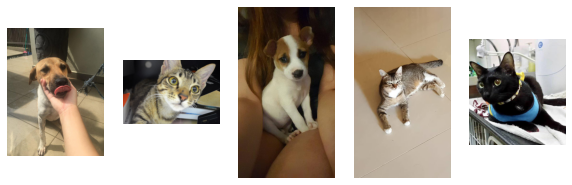

In [ ]:
#print 5 pictures with poor score 
print_images(base_path, df_poor)

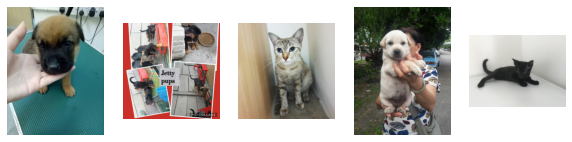

In [ ]:
#print 5 pictures with unsatisfactory score 
print_images(base_path, df_unsatis)

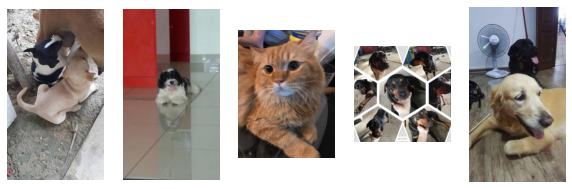

In [ ]:
#print 5 pictures with acceptable score 
print_images(base_path, df_accep)

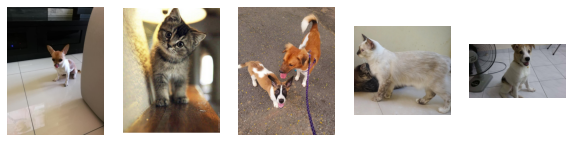

In [ ]:
#print 5 pictures with good score 
print_images(base_path, df_good)

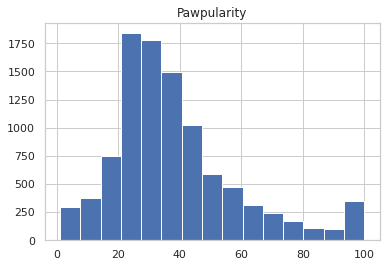

In [ ]:
#view the distribution of the score
df_train.hist(column='Pawpularity', bins=15);

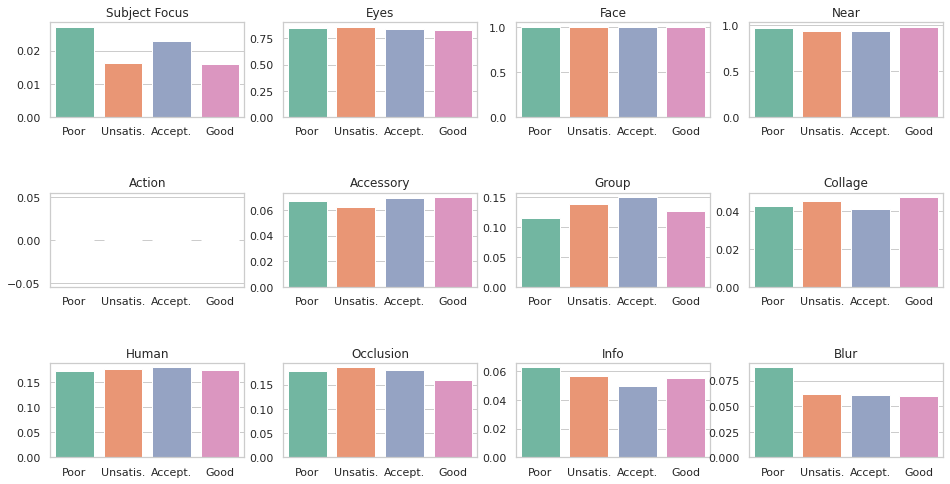

In [ ]:
categories = ['Poor', 'Unsatis.', 'Accept.', 'Good']
labels = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur']

fig, axs = plt.subplots(3, 4,figsize=(16,8))

def plot_subplot(label, df, row, col):
  ax = sns.barplot(ax=axs[row,col], x = categories, y = normalized_df.loc[label], data = df, palette = 'Set2')
  ax.set_title(label)
  ax.set(ylabel=None)

index = 0
for row in range (3):
  for col in range (4):
    plot_subplot(labels[index], normalized_df, row, col)
    index += 1

plt.subplots_adjust(hspace = 0.8)
plt.show()

In [ ]:
#Split the csv file into 4 based on the category
#df_poor.to_csv("/content/drive/MyDrive/APS360 Project/data/train_poor.csv")
#df_unsatis.to_csv("/content/drive/MyDrive/APS360 Project/data/train_unsatisfactory.csv")
#df_accep.to_csv("/content/drive/MyDrive/APS360 Project/data/train_acceptable.csv")
#df_good.to_csv("/content/drive/MyDrive/APS360 Project/data/train_good.csv")

In [ ]:
#jhanavi's drive:
#Split the csv file into 4 based on the category
df_poor.to_csv("/content/drive/MyDrive/APS360/data/train_poor.csv")
df_unsatis.to_csv("/content/drive/MyDrive/APS360/data/train_unsatisfactory.csv")
df_accep.to_csv("/content/drive/MyDrive/APS360/data/train_acceptable.csv")
df_good.to_csv("/content/drive/MyDrive/APS360/data/train_good.csv")

In [ ]:
display(df_poor)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
6,0023b8a3abc93c712edd6120867deb53,0,1,1,1,0,0,0,0,1,1,0,0,22
9,0049cb81313c94fa007286e9039af910,0,1,1,1,0,0,0,0,0,0,0,0,21
11,00524dbf2637a80cbc80f70d3ff59616,0,1,1,1,0,0,0,0,0,0,0,0,2
12,00630b1262efe301cb15a3b2022ba744,0,1,1,1,0,0,0,0,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,ff6123b262da1a561197a5a25c212964,0,1,1,1,0,0,0,0,0,0,0,0,23
9900,ff75490f8f99867fc9dec1c298e0761a,0,1,1,1,0,0,0,0,0,0,0,0,20
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


In [ ]:
#Starting the CNN

#Key parameters initialization
epochs = 30
batch_size = 64 #start at a reasonable amount
height = 158
width = 158

#Create different changes and altercations for images
train_changes = ImageDataGenerator( rescale=1./255, rotation_range=40, width_shift_range=.2, height_shift_range=.2, horizontal_flip=True, zoom_range=0.25)

validation_images = ImageDataGenerator(rescale=1./255)

#Making path
TRAIN_PATH = '/content/drive/MyDrive/APS360/train/'
VAL_PATH =  '/content/drive/MyDrive/APS360/validation/'


#Normalizing data

#train_dataset = train_changes.flow_from_directory(batch_size=batch_size,directory=TRAIN_PATH, shuffle=True, target_size=(height, width), class_mode='binary')
#validation_dataset = validation_images.flow_from_directory(batch_size=batch_size,directory=VAL_PATH, target_size=(height, width),  class_mode='binary')


#Attempting to use a sequential model
model = Sequential([
    Conv2D(14, 4, padding='same', activation='relu', input_shape=(height, width ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(28, 4, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(56, 4, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
# print the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 14)      686       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 14)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 79, 79, 14)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 79, 79, 28)        6300      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 28)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 56)        2

**PRIMARY MODEL:**

Data loading:

In [ ]:
import os
count = 0
d = "/content/drive/MyDrive/APS360/train"
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        count += 1
print(count)

9912


In [ ]:
total_data = pd.read_csv('/content/drive/MyDrive/APS360/train.csv')
data = total_data[['Id','Pawpularity']]
normalized_df=(data['Pawpularity']-data['Pawpularity'].min())/(data['Pawpularity'].max()-data['Pawpularity'].min())
data['Pawpularity'] = normalized_df
display(normalized_df)
display(data)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       0.626263
1       0.414141
2       0.272727
3       0.141414
4       0.717172
          ...   
9907    0.141414
9908    0.696970
9909    0.191919
9910    0.191919
9911    0.292929
Name: Pawpularity, Length: 9912, dtype: float64

,Id,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0.626263
1,0009c66b9439883ba2750fb825e1d7db,0.414141
2,0013fd999caf9a3efe1352ca1b0d937e,0.272727
3,0018df346ac9c1d8413cfcc888ca8246,0.141414
4,001dc955e10590d3ca4673f034feeef2,0.717172
...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0.141414
9908,ffcc8532d76436fc79e50eb2e5238e45,0.696970
9909,ffdf2e8673a1da6fb80342fa3b119a20,0.191919
9910,fff19e2ce11718548fa1c5d039a5192a,0.191919


In [ ]:
data.shape

(9912, 2)

In [ ]:
#spitting data into training and validation set :
training_set = data.iloc[:6938,:]#70% of the given training data
validation_set = data.iloc[6938:8425]#an additional 15% is the validation dataset
testing_set = data.iloc[8425:,:]

In [ ]:
training_set.shape #training set 

In [ ]:
validation_set.shape #validation set

In [ ]:
testing_set.shape #testing set 

In [ ]:
display(training_set)

In [ ]:
display(validation_set)

In [ ]:
#testing_set = pd.read_csv('/content/drive/MyDrive/APS360/test.csv')
display(testing_set)

In [ ]:
#Data Rearrangement: Poor:
import csv
import shutil
with open('/content/drive/MyDrive/APS360/data/train_poor.csv','rt')as f:
  loading = csv.reader(f)
  for row in loading:
        if row[1] != 'Id':
          fname = '{}.jpg'.format(row[1])
          src = os.path.join('/content/drive/MyDrive/APS360/train/', fname)
          dst = os.path.join('/content/drive/MyDrive/APS360/data_preprocessing/Poor/', fname);
          #print(dst)
          shutil.copyfile(src, dst)

In [ ]:
loading.line_num

2354

In [ ]:
#Data Rearrangement: Unsatisfactory:
import csv
import shutil
with open('/content/drive/MyDrive/APS360/data/train_unsatisfactory.csv','rt')as f:
  loading = csv.reader(f)
  for row in loading:
        if row[1] != 'Id':
          fname = '{}.jpg'.format(row[1])
          src = os.path.join('/content/drive/MyDrive/APS360/train/', fname)
          dst = os.path.join('/content/drive/MyDrive/APS360/data_preprocessing/Unsatisfied/', fname);
          #print(dst)
          shutil.copyfile(src, dst)

In [ ]:
#Data Rearrangement: Acceptable:
import csv
import shutil
with open('/content/drive/MyDrive/APS360/data/train_acceptable.csv','rt')as f:
  loading = csv.reader(f)
  for row in loading:
        if row[1] != 'Id':
          fname = '{}.jpg'.format(row[1])
          src = os.path.join('/content/drive/MyDrive/APS360/train/', fname)
          dst = os.path.join('/content/drive/MyDrive/APS360/data_preprocessing/Acceptable/', fname);
          #print(dst)
          shutil.copyfile(src, dst)

In [ ]:
#Data Rearrangement: Good:
import csv
import shutil
with open('/content/drive/MyDrive/APS360/data/train_good.csv','rt')as f:
  loading = csv.reader(f)
  for row in loading:
        if row[1] != 'Id':
          fname = '{}.jpg'.format(row[1])
          src = os.path.join('/content/drive/MyDrive/APS360/train/', fname)
          dst = os.path.join('/content/drive/MyDrive/APS360/data_preprocessing/Good/', fname);
          #print(dst)
          shutil.copyfile(src, dst)

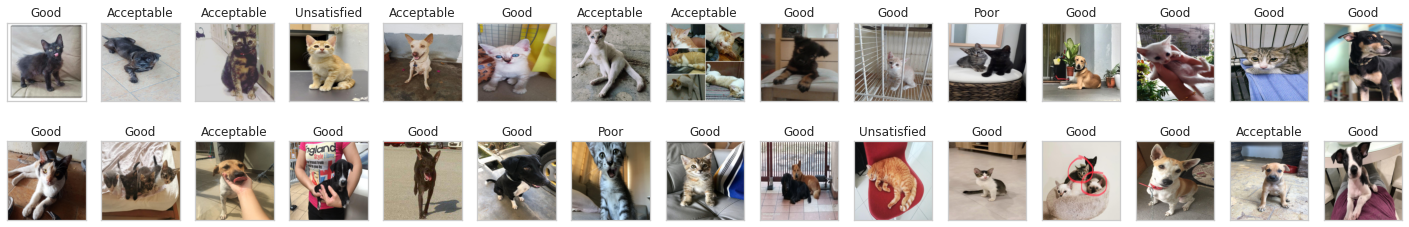

In [ ]:
# sample code
# Loading Gesture Images from Google Drive
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

torch.manual_seed(1) # set the random seed
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt

# location on Google Drive
master_path = '/content/drive/MyDrive/APS360/data_preprocessing'##change this later 


# Transform Settings - Do not use RandomResizedCrop
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

# Load data from Google Drive
dataset = torchvision.datasets.ImageFolder(master_path, transform=transform)

# Prepare Dataloader
batch_size = 32
num_workers = 1
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

# Verification Step - obtain one batch of images
dataiter = iter(data_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

classes = ['Poor', 'Unsatisfied', 'Acceptable', 'Good']

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(30):
    ax = fig.add_subplot(2, 30/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:
import os 
def count_files(section): 
  i=0
  x=[]
  for file in os.listdir('/content/drive/MyDrive/APS360/data_preprocessing/'+section):
      if file.endswith('.jpg'):
          #print(file)
          x.append(file)
          i+=1
  #print('the total number of files: ' +str(i))
  return str(i)

print("Poor: " + count_files('Poor'))
print("Unsatisfactory: " + count_files('Unsatisfied'))
print("Acceptable: " + count_files('Acceptable'))
print("Good: " + count_files('Good'))

Poor: 2353
Unsatisfactory: 5440
Acceptable: 1410
Good: 709


In [ ]:
def splitting_dataset(section, CSV):
  
  c = 1
  with open('/content/drive/MyDrive/APS360/data/'+ CSV,'rt')as f:
    loading = csv.reader(f)
    length = len(list(loading)) - 1
    split1 = int(length*0.7)
    split2 = int(length*0.85)
    #split3 = int(length*0.85+5)
    print(length)
    print(split1)
    print(split2)
    #print(split3)

  with open('/content/drive/MyDrive/APS360/data/'+ CSV,'rt')as f:
    loading2 = csv.reader(f)
    for row in loading2:
      #print(row[1])
      if(row[1]!='Id'):
        c = c + 1
        if c < split1: #into the training_dataset
          fname = '{}.jpg'.format(row[1])
          dst = os.path.join('/content/drive/MyDrive/APS360/dataset/train_dataset/'+section+'/', fname)
          src = os.path.join('/content/drive/MyDrive/APS360/train/', fname)
          shutil.copyfile(src, dst)

        elif c > split1 and c < split2:  #into the validation dataset
          #print("traing")
          fname = '{}.jpg'.format(row[1])
          dst = os.path.join('/content/drive/MyDrive/APS360/dataset/val_dataset/'+section+'/', fname)
          src = os.path.join('/content/drive/MyDrive/APS360/train/', fname)
          shutil.copyfile(src, dst)
          
        elif c > split2   #into the testing_dataset
          fname = '{}.jpg'.format(row[1])
          dst = os.path.join('/content/drive/MyDrive/APS360/dataset/test_dataset/'+section+'/', fname)
          src = os.path.join('/content/drive/MyDrive/APS360/train/', fname)
          shutil.copyfile(src, dst)
        #splitting into 4 parts 
        #elif c > split2 and c < split3:  #into the testing_dataset1
         # fname = '{}.jpg'.format(row[1])
          #dst = os.path.join('/content/drive/MyDrive/APS360/dataset/test_dataset/'+section+'/', fname)
          #src = os.path.join('/content/drive/MyDrive/APS360/train/', fname)
          #shutil.copyfile(src, dst)
        #elif c > split3 #into testing_dataset2
         # fname = '{}.jpg'.format(row[1])
          #dst = os.path.join('/content/drive/MyDrive/APS360/dataset/test_dataset2/'+section+'/', fname)
          #src = os.path.join('/content/drive/MyDrive/APS360/train/', fname)
          #shutil.copyfile(src, dst)

In [ ]:
splitting_dataset('Poor','train_poor.csv')

2353
1647
2000


In [ ]:
splitting_dataset('Unsatisfied','train_unsatisfactory.csv')

5440
3807
4624


In [ ]:
splitting_dataset('Acceptable','train_acceptable.csv')

1410
986
1198


In [ ]:
splitting_dataset('Good','train_good.csv')

709
496
602


In [ ]:
train_path = '/content/drive/MyDrive/APS360/dataset/train_dataset/'
valid_path = '/content/drive/MyDrive/APS360/dataset/val_dataset/'
test_path = '/content/drive/MyDrive/APS360/dataset/test_dataset/'
test_path2 = '/content/drive/MyDrive/APS360/dataset/test_dataset_2/'


#test_dataset2 was done mannually to test the model with a new image but without biasing the model towards the entire test case

# Transform Settings - Do not use RandomResizedCrop
transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])

# Load data from Google Drive
train_dataset = torchvision.datasets.ImageFolder(train_path, transform=transform)
valid_dataset = torchvision.datasets.ImageFolder(valid_path, transform=transform)
test_dataset = torchvision.datasets.ImageFolder(test_path, transform=transform)
test_dataset2 = torchvision.datasets.ImageFolder(test_path2, transform=transform)

print("train set size: ", len(train_dataset))
print("validation set size: ", len(valid_dataset)) 
print("test set size: ", len(test_dataset))
print("test set 2 size:", len(test_dataset2))

train set size:  6928
validation set size:  1484
test set size:  1488
test set 2 size: 4


In [ ]:
class CNN(nn.Module):

      def __init__(self):
          self.name = "CNN"
          super(CNN, self).__init__()
          self.conv1 = nn.Conv2d(3, 5, 5) #in_channels=3, out_chanels=5, kernel_size=5
          self.pool = nn.MaxPool2d(2, 2) #kernel_size=2, stride=2 
          self.conv2 = nn.Conv2d(5, 10, 5) #in_channels=5, out_chanels=10, kernel_size=5
          self.fc1 = nn.Linear(10*53*53, 32)
          self.fc2 = nn.Linear(32, 4)

      def forward(self, x):
           x = self.pool(F.relu(self.conv1(x))) #relu activation function
           x = self.pool(F.relu(self.conv2(x))) #relu activation function
           x = x.view(-1, 10*53*53)
           x = F.relu(self.fc1(x)) #relu activation function
           x = self.fc2(x)
           return x

In [ ]:
import math

In [ ]:
def get_accuracy(model, train_loader, valid_loader, train=False):
    if train:
        data = train_loader
    else:
        data = valid_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, train_dataset, valid_dataset, batch_size=64, learning_rate=0.001, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    print(len(train_loader))
    print(len(valid_loader))
    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    epoch = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch


        # save the current training information
        iters.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(get_accuracy(model, train_loader, valid_loader, train=True)) # compute training accuracy
        print("epoch number ", epoch+1, "accuracy: ",train_acc[epoch]) 
        val_acc.append(get_accuracy(model, train_loader, valid_loader, train=False))  # compute validation accuracy
        model_path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        model_name_save = '/content/drive/MyDrive/APS360/rec_models/score_model_state.pth'
        torch.save(model.state_dict(), model_name_save)

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
use_cuda = True
model = CNN()
 
#proper model
train(model, train_dataset, valid_dataset, batch_size = 1000, learning_rate = 0.001, num_epochs=10)

7
2


KeyboardInterrupt: ignored

In [ ]:
def evaluate_demo(net, img_path):
  image = image_loader(img_path)
  outputs = net(image)
  #print(max(outputs[0]))
  if(max(outputs[0]) == outputs[0][0]):
    print("Poor")
  elif(max(outputs[0]) == outputs[0][1]):
    print("Unsatisfactory")
  elif(max(outputs[0]) == outputs[0][2]):
    print("Acceptable")
  else:
    print("Good") 

In [ ]:
def demo_category(img_path):
  print("Ground Truth: Acceptable")

In [ ]:
def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])((image))
    image = image.unsqueeze(0)
    return image


In [ ]:
def get_test_accuracy(model, test_loader):
    data = test_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total


In [ ]:
def demo_rec_model(img_path):
  print("The Pawpularity score is: \n")
  model_focus = CNN()
  model_path = '/content/drive/MyDrive/APS360/rec_models/score_model_state.pth'
  model_focus.load_state_dict(torch.load(model_path))
  pred_focus = evaluate_demo(model_focus, img_path)

In [ ]:
def demo_img(img_path): 
  fig = plt.figure(figsize=(10, 10))
  plt.imshow(Image.open(img_path))  

In [ ]:
# best parameters: 5*5 kernel size, batch_size = 16, learning_rate = 0.0001, num_epochs = 3
best_model = CNN()
state = torch.load('/content/drive/MyDrive/APS360/rec_models/score_model_state.pth')
best_model.load_state_dict(state)
if use_cuda and torch.cuda.is_available():
    best_model.cuda()

test_dataloader2 = torch.utils.data.DataLoader(test_dataset2, batch_size=1, shuffle=True)
test_accuracy2 = get_test_accuracy(model, test_dataloader2)
print("test accuracy:", test_accuracy2)

test accuracy: 0.25


28
6
epoch number  1 accuracy:  0.5492205542725174
epoch number  2 accuracy:  0.5492205542725174
epoch number  3 accuracy:  0.5492205542725174
epoch number  4 accuracy:  0.5492205542725174
epoch number  5 accuracy:  0.5492205542725174
epoch number  6 accuracy:  0.5492205542725174


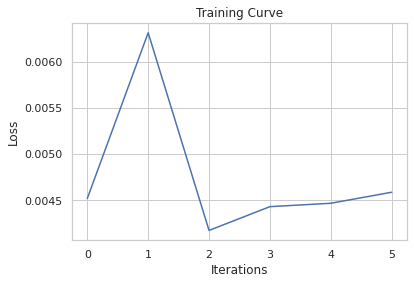

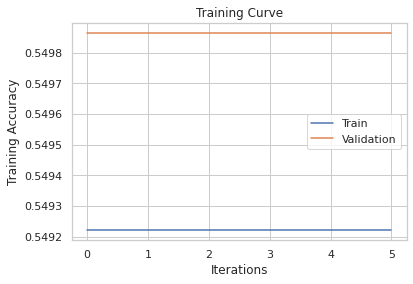

Final Training Accuracy: 0.5492205542725174
Final Validation Accuracy: 0.5498652291105122


In [ ]:
use_cuda = True
model = CNN()
 
#proper model
train(model, train_dataset, valid_dataset, batch_size = 256, learning_rate = 0.01, num_epochs=6)

Ground Truth: Acceptable


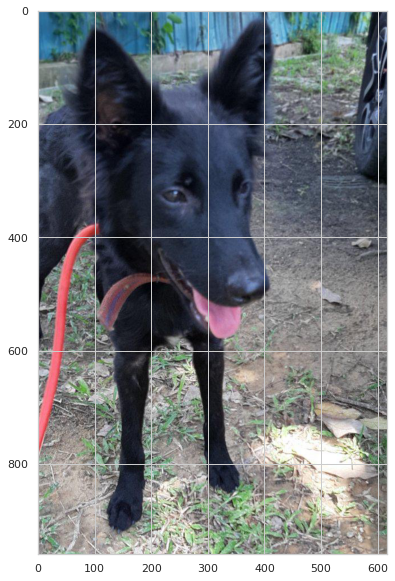

In [ ]:
demo_img('/content/drive/MyDrive/APS360/dataset/test_dataset_2/Acceptable/da01e21c4eae356af7c4d94b29440241.jpg')
demo_category('/content/drive/MyDrive/APS360/dataset/test_dataset_2/Acceptable/da01e21c4eae356af7c4d94b29440241.jpg')

In [ ]:
demo_rec_model('/content/drive/MyDrive/APS360/dataset/test_dataset_2/Acceptable/da01e21c4eae356af7c4d94b29440241.jpg')

The Pawpularity score is: 

Acceptable


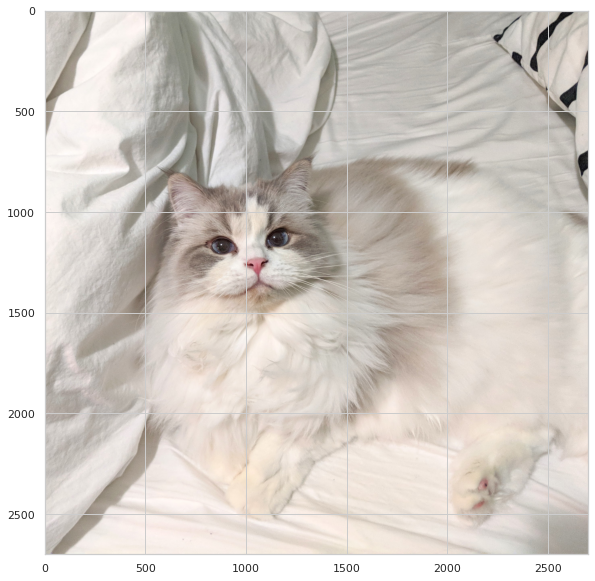

In [ ]:
demo_img('/content/drive/MyDrive/APS360/cat.jpg')

In [ ]:
demo_rec_model('/content/drive/MyDrive/APS360/cat.jpg')

The Pawpularity score is: 

Acceptable
